Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.97
Recall: 0.93
ROC-AUC: 1.00


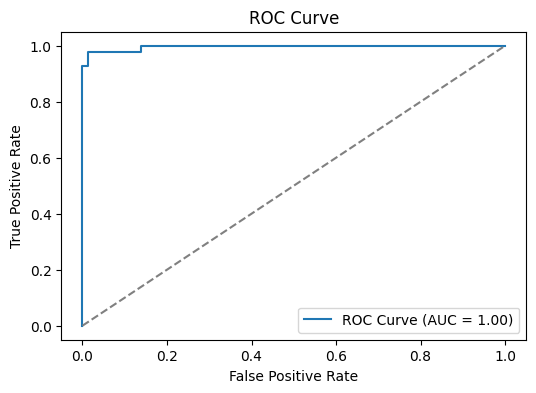


With threshold = 0.3:
Confusion Matrix:
 [[71  1]
 [ 1 41]]
Precision: 0.98
Recall: 0.98


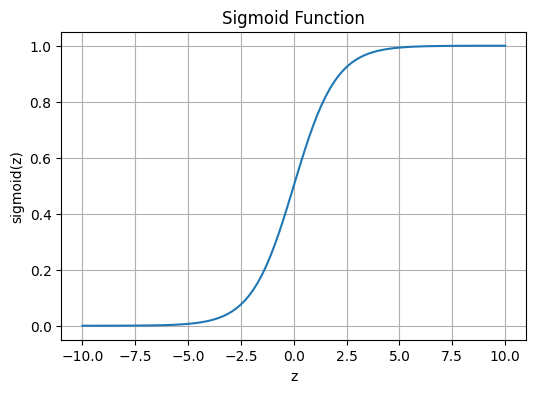

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

# 1. Load the dataset with correct path
df = pd.read_csv(r'D:\ML PROJECTS\elevate labs intenship\task 4\data.csv')

# 2. Remove unnamed columns (if any) and drop 'id' if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# 3. Drop rows with missing values
df = df.dropna()

# 4. Convert diagnosis to binary: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 5. Remove empty trailing columns (sometimes CSVs have a trailing comma)
df = df.loc[:, df.columns.notnull()]

# 6. Ensure DataFrame is not empty
assert not df.empty, "DataFrame is empty after cleaning!"

# 7. Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 8. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Fit Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 11. Predictions and probabilities
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# 12. Evaluation
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# 13. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

# 14. Threshold tuning example
threshold = 0.3
y_pred_new = (y_proba >= threshold).astype(int)
cm_new = confusion_matrix(y_test, y_pred_new)
precision_new = precision_score(y_test, y_pred_new)
recall_new = recall_score(y_test, y_pred_new)
print(f"\nWith threshold = {threshold}:")
print("Confusion Matrix:\n", cm_new)
print(f"Precision: {precision_new:.2f}")
print(f"Recall: {recall_new:.2f}")

# 15. Sigmoid function plot
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.figure(figsize=(6,4))
plt.plot(z, sigmoid(z))
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.savefig('sigmoid_curve.png')
plt.show()
